# World Universities Data Analysis
In this notebook, I'll be doing exploratory data analysis on world university rankings. I want to look at the following:

1. Geographical Analysis:
- Which countries have the highest number of top-ranked universities?
- How does the distribution of universities vary across different countries?

2. University Characteristics:
- What is the correlation between the overall university rank and the student population?
- How does the student-to-staff ratio vary among the top-ranked universities?
- Are there patterns in the female-to-male ratio across universities and countries?

3. Internationalization:
- How does the percentage of international students relate to the global ranking of universities?
- Are there countries that attract a higher percentage of international students?

4. Performance Metrics:
- What factors contribute the most to the overall score of a university? (Teaching, research, etc.)
- How do teaching and research scores individually contribute to the overall university ranking?

5. Gender Diversity:
- Are there universities with a notably high or low female-to-male ratio?
- Does the gender ratio correlate with the overall score or specific metrics?

6. Research Environment:
- How does the research environment score correlate with the overall university rank?
- Are there specific countries or regions with a better research environment?

7. Trends Over Time:
- Are there any noticeable trends or changes in university rankings over the years?
- How have the scores for teaching, research, and overall ranking evolved?

8. Comparisons Between Metrics:
- Is there a strong correlation between teaching and research scores?
- How does the international outlook correlate with the percentage of international students?

9. Outliers and Anomalies:
- Are there universities that perform exceptionally well in one metric but lower in others?
- Are there any universities with a surprisingly high or low student-to-staff ratio?

10. Impact on Industry:
- How does the industry impact score relate to the overall university ranking?
- Are there universities with a strong industry impact but lower overall scores?

## Preprocessing And Cleaning

First, we have to load in the data and then we'll do some data cleaning accordingly

In [1]:
# Import relevant libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in the data
# Specify the encoding when reading the CSV file because we can't load it in with default utf-8 encoding
world_uni_df = pd.read_csv('./world-uni-rankings.csv', encoding='latin1')
world_uni_df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


Ok, so first thoughts is that the column with female to male ratio has to change. I think it'll be easier to work with the data if we create 2 separate columns for the percentages of male/female population for that university

In [10]:
# By Best Overall 
def best_overall(year=2024):
    sorted_year = world_uni_df[world_uni_df['Year'] == year]
    sort = sorted_year.sort_values('Overall Score', ascending=False)
    school = sort['Name'].iloc[0]
    score = sort['Overall Score'].iloc[0]
    return school, score

a,b = best_overall()
a

'University of Oxford'

In [47]:
# See summary statistics
world_uni_df.describe()

,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
count,12430.000000,1.243000e+04,12430.000000,12430.000000,12430.000000,12430.000000,12430.000000,12430.000000,12430.000000,12430.000000
mean,736.831054,2.336700e+04,18.897812,35.333011,28.536669,24.108640,49.188648,46.505502,47.604875,2020.664200
std,467.960733,3.498715e+04,17.057811,16.883561,14.061391,17.598593,27.534337,18.695916,23.002701,2.483259
min,1.000000,2.500000e+01,0.300000,8.222500,8.200000,0.800000,0.700000,0.000000,7.100000,2016.000000
25%,346.000000,1.014950e+04,12.300000,21.731875,18.800000,11.700000,24.500000,35.300000,28.225000,2019.000000
50%,691.000000,1.782400e+04,16.300000,32.402750,24.300000,18.100000,47.450000,39.500000,43.300000,2021.000000
75%,1078.000000,2.921850e+04,22.000000,45.189375,33.800000,30.500000,72.975000,52.200000,63.600000,2023.000000
max,1904.000000,1.824383e+06,865.800000,98.457500,99.000000,100.000000,100.000000,100.000000,100.000000,2024.000000


In [48]:
# Check for null values
world_uni_df.isnull().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

Since we have 591 missing values for the Female to Male ratio column, We need to deal with them. Now although we can impute the values with arbitrary values like 0 or 1, I don think it will be that valuable because we're talking about ratios. Even if I were to impute it with the value 50:50 to show equality, I think that's not representative of the data and might skew our analysis of the data. Hence, I will simply remove rows with the missing value

In [49]:
# Let's delete the ones with no female to male ratio

world_uni_df = world_uni_df.dropna(axis=0)

In [50]:
world_uni_df.isnull().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
International Students     0
Female to Male Ratio       0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
dtype: int64

In [51]:
world_uni_df.shape

(11839, 14)

As you can see, our rows of data decreased from 12430 to 11839 which is actually a subtraction of 591 from 12430. Now we can proceed with splitting up the female to male ratio column to percentage female population and percentage male population

In [52]:
world_uni_df['Female to Male Ratio'] = world_uni_df['Female to Male Ratio'].str.replace(" ", "")

In [53]:
import pandas as pd

# Assuming 'world_uni_df' is your DataFrame

# Create a boolean mask for rows where the length is greater than 4
mask = world_uni_df['Female to Male Ratio'].str.len() > 5

# Apply the slicing operation only to the selected rows
world_uni_df.loc[mask, 'Female to Male Ratio'] = world_uni_df.loc[mask, 'Female to Male Ratio'].str[:-3]

# Display the result
print(world_uni_df['Female to Male Ratio'].head())


0    33:67
1    46:54
2    42:58
3    46:54
4    37:63
Name: Female to Male Ratio, dtype: object


In [54]:
world_uni_df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33:67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37:63,92.0,89.4,88.6,99.7,95.4,84.0,2016


In [55]:
# Now we need the female population percentage
world_uni_df['Female Population Percentage'] = world_uni_df['Female to Male Ratio'].str[0:2]

world_uni_df['Female Population Percentage']

0        33
1        46
2        42
3        46
4        37
         ..
12425    56
12426    50
12427    49
12428    66
12429    60
Name: Female Population Percentage, Length: 11839, dtype: object

In [56]:
# Assuming 'world_uni_df' is your DataFrame
column_to_convert = 'Female Population Percentage'

# Convert the column to numeric, handling non-numeric values
world_uni_df[column_to_convert] = pd.to_numeric(world_uni_df[column_to_convert], errors='coerce').astype('Int64')

# Display the result
print(world_uni_df[column_to_convert])


0        33
1        46
2        42
3        46
4        37
         ..
12425    56
12426    50
12427    49
12428    66
12429    60
Name: Female Population Percentage, Length: 11839, dtype: Int64


In [58]:
# Do the same for male population percentage
world_uni_df['Male Population Percentage'] = world_uni_df['Female to Male Ratio'].str[3:]

world_uni_df['Male Population Percentage']

0        67
1        54
2        58
3        54
4        63
         ..
12425    44
12426    50
12427    51
12428    34
12429    40
Name: Male Population Percentage, Length: 11839, dtype: object

In [60]:
# Convert the column to numeric, handling non-numeric values
world_uni_df['Male Population Percentage'] = pd.to_numeric(world_uni_df['Male Population Percentage'], errors='coerce').astype('Int64')

# Display the result
print(world_uni_df['Male Population Percentage'])

0        67
1        54
2        58
3        54
4        63
         ..
12425    44
12426    50
12427    51
12428    34
12429    40
Name: Male Population Percentage, Length: 11839, dtype: Int64


In [66]:
# Finally we drop the Female to Male Ratio column
world_uni_df.drop('Female to Male Ratio', inplace=True, axis=1)
world_uni_df.head(10)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Population Percentage,Male Population Percentage
0,1.0,California Institute of Technology,United States,2243,6.9,26%,95.2,95.6,97.6,99.8,97.8,64.0,2016,33,67
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,94.2,86.5,98.9,98.8,73.1,94.4,2016,46,54
2,3.0,Stanford University,United States,15596,7.8,22%,93.9,92.5,96.2,99.9,63.3,76.3,2016,42,58
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,92.8,88.2,96.7,97.0,55.0,91.5,2016,46,54
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,92.0,89.4,88.6,99.7,95.4,84.0,2016,37,63
6,7.0,Princeton University,United States,7929,8.4,27%,90.1,85.1,91.9,99.3,52.1,78.5,2016,45,55
7,8.0,Imperial College London,United Kingdom,15060,11.7,51%,89.1,83.3,88.5,96.7,53.7,96.0,2016,37,63
8,9.0,ETH Zurich,Switzerland,18178,14.7,37%,88.3,77.0,95.0,91.1,80.0,97.9,2016,31,69
9,10.0,The University of Chicago,United States,14221,6.9,20%,87.9,85.7,88.9,99.2,36.6,65.0,2016,42,58
10,11.0,Johns Hopkins University,United States,15128,3.6,23%,87.6,77.6,90.4,98.2,100.0,70.0,2016,50,50


With that we've cleaned the data and can proceed with further exploratory data analysis.

## 1. Geographical Analysis
- Which countries have the highest number of top-ranked universities for any given year?
- How does the distribution of universities vary across different countries?

In [70]:
print(f"Most Recent Year: {(world_uni_df.sort_values('Year', ascending=False))['Year'].iloc[0]}")

Most Recent Year: 2024


Ok, we have data up until 2024, let's narrow down the first prompt and ask: Which countries have the highest number of top-ranked universities in 2024? 

We also have to define what we mean by top ranked, let's take the top 10 Universities in 2024, group them up by country and plot a horizontal barchart of their counts.

In [73]:
# Filter for top 10 in 2024
uni_2024 = world_uni_df[world_uni_df['Year'] == 2024]
top_10_uni = uni_2024.sort_values('Overall Score', ascending=False)
top_10_uni = top_10_uni[:10]
top_10_uni

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Female Population Percentage,Male Population Percentage
10526,1.0,University of Oxford,United Kingdom,21750,10.9,42%,98.4575,96.6,100.0,99.0,98.7,97.5,2024,49,51
10527,2.0,Stanford University,United States,14517,6.4,23%,97.9720,99.0,97.8,99.6,100.0,87.0,2024,47,53
10528,3.0,Massachusetts Institute of Technology,United States,11085,8.0,33%,97.9300,98.6,96.2,99.7,100.0,93.8,2024,41,59
10529,4.0,Harvard University,United States,20050,9.0,25%,97.7905,97.7,99.9,99.4,84.2,90.8,2024,51,49
10530,5.0,University of Cambridge,United Kingdom,20565,11.5,38%,97.4820,95.8,100.0,98.0,87.9,97.4,2024,48,52
10531,6.0,Princeton University,United States,7753,7.3,23%,96.9260,96.3,97.9,98.8,95.1,89.1,2024,47,53
10532,7.0,California Institute of Technology,United States,2240,6.1,33%,96.4820,96.6,98.0,95.9,100.0,90.6,2024,37,63
10533,8.0,Imperial College London,United Kingdom,20275,11.8,61%,95.0990,90.9,95.5,98.6,90.9,98.3,2024,42,58
10534,9.0,"University of California, Berkeley",United States,39991,17.9,22%,94.5620,87.2,98.8,99.0,99.4,86.8,2024,52,48
10535,10.0,Yale University,United States,11924,5.2,21%,94.2010,94.0,94.9,97.7,86.5,82.4,2024,51,49


In [76]:
# Group by country
top_10_uni_by_country = top_10_uni.groupby('Country').size().reset_index(name='Count')

top_10_uni_by_country

,Country,Count
0,United Kingdom,3
1,United States,7


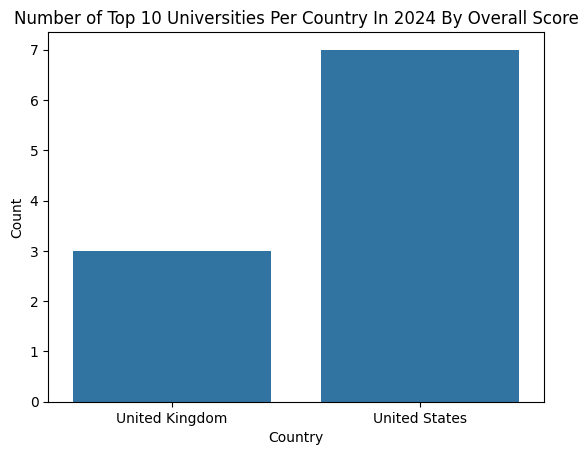

In [81]:
sns.barplot(top_10_uni_by_country, x='Country', y='Count')
plt.title('Number of Top 10 Universities Per Country In 2024 By Overall Score')
plt.show()

Now let's write this in a manner where you can see the distribution of the top 10 Universities in any year and in any category

In [97]:
def top_ten(year=2024, category='Overall Score'):
    sorted_year = world_uni_df[world_uni_df['Year'] == year]
    sorted_values = sorted_year.sort_values(category, ascending=False)
    top_10 = sorted_values[:10]
    
    # Group
    group = top_10.groupby('Country').size().reset_index(name='Count')

    # plot
    sns.color_palette('pastel')
    sns.barplot(data=group, x='Count', y='Country', orient='h')
    plt.title(f'Number of Top 10 Universities Per Country In {year} by {category}')
    plt.tight_layout()
    plt.show()

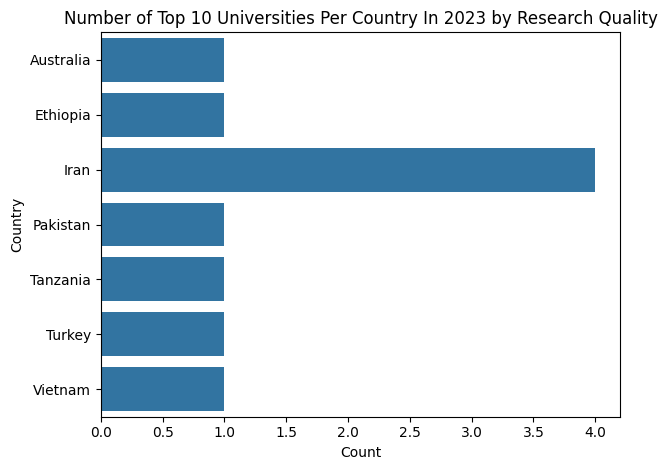

In [98]:
top_ten(year=2023, category='Research Quality')

Perhaps it would also be valuable to generate a table containing the top 10 Universities in each Country for any given year and for any category. 

Then, I also want to look at all the countries in 2024, and plot a bar chart sorted in descending order to see which countries have the most and least number of Universities